In [12]:
import math
import sys
import os
from scipy.optimize import linprog
import numpy as np
import random
import matplotlib.pyplot as plt


In [13]:
def plot_price_curve(price_curve: list):
    import matplotlib.pyplot as plt

    plt.step(range(24),price_curve)
    plt.xlabel("Hour")
    plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=45)
    plt.ylabel("NOK per kWh")
    plt.title("Generated price curve for a day")
    plt.ylim(0)
    plt.show()


# price_curve = generate_RTP_price_curve()
# plot_price_curve(price_curve)
# print(f"Randomly generated real-time price curve (NOK/kWh per hour) : {price_curve}")

def plot_price_curve_vs_usage(price_curve: list, usage: list) -> None: 
    ''' Plot the price curve and the usage curve in the same graph

    Args:
        price_curve: list of float, the price curve in NOK per kWh
        usage: list of float, the usage in kWh for each hour. Example: [(10, 5.5)] for 5.5 kWh at 10:00am
    
    Returns:
        None
    '''

    #plotting the optimal power usage against the price curve
    plt.step(range(24), price_curve, label="Price curve (NOK/kWh)")
    plt.step(range(24), usage, label="Optimal power usage (kWh)")
    plt.xlabel("Hour")
    # xticks are the hours of the day formatted hour
    plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=45)

    plt.title("Optimal power usage vs price curve")
    plt.legend()
    plt.show()


# Question 1

In [14]:
# Constants
peak_cost = 1  # dollars per kWh during peak hours
non_peak_cost = 0.5  # dollars per kWh during non-peak hours
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm

# Power requirements for each applicant (in kWh)
power_requirements = [ 
        1.94, # Laundry machine
        9.9, # EV charger
        1.44 # Dishwasher
        ]

# Objective function coefficients (cost per kWh)
costs = [non_peak_cost if hour not in peak_hours else peak_cost for hour in range(24)]

# Construct the constraint matrix (each row represents an applicant's power usage)
A_eq = np.zeros((4, 24))  # 4 rows for each applicant and one for the total power usage
for i in range(3):
    A_eq[i, i * 8:(i + 1) * 8] = 1  # Assign 1 to the corresponding hours for each applicant
A_eq[3, :] = 1  # Total power usage constraint

# Define the right-hand side vector (power requirements)
b_eq = power_requirements + [sum(power_requirements)]  # Power requirements for each applicant and total power requirement

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# Extract the optimal power usage
optimal_usage = result.x

# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", result.fun, "dollars")



Optimal power usage for each hour:
Hour 0: 1.94 kWh
Hour 1: 0.00 kWh
Hour 2: 0.00 kWh
Hour 3: 0.00 kWh
Hour 4: 0.00 kWh
Hour 5: 0.00 kWh
Hour 6: 0.00 kWh
Hour 7: 0.00 kWh
Hour 8: 9.90 kWh
Hour 9: 0.00 kWh
Hour 10: 0.00 kWh
Hour 11: 0.00 kWh
Hour 12: 0.00 kWh
Hour 13: 0.00 kWh
Hour 14: 0.00 kWh
Hour 15: 0.00 kWh
Hour 16: 1.44 kWh
Hour 17: 0.00 kWh
Hour 18: 0.00 kWh
Hour 19: 0.00 kWh
Hour 20: 0.00 kWh
Hour 21: 0.00 kWh
Hour 22: 0.00 kWh
Hour 23: 0.00 kWh
Total cost: 6.64 dollars


In [15]:
print(b_eq)


[1.94, 9.9, 1.44, 13.28]


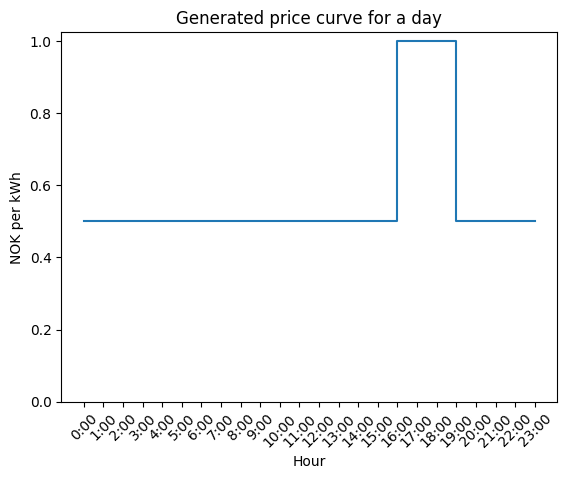

In [16]:
plot_price_curve(costs)


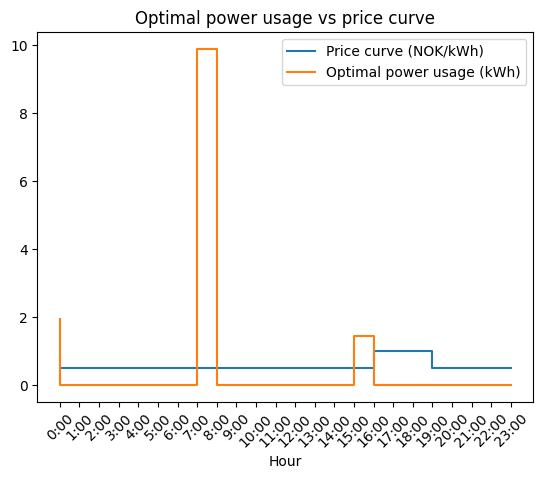

In [17]:
plot_price_curve_vs_usage(costs, optimal_usage)


# Question 2

# Question 3

# Question 4

In [33]:
# Constants
peak_cost = 1  # dollars per kWh during peak hours
non_peak_cost = 0.5  # dollars per kWh during non-peak hours
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm
total_power_limit = 2  # Maximum total power usage per hour

# Power requirements and time constraints for each applicant
applicants = [
    {"power": 1.94, "hours": range(24)},  # A 
    {"power": 9.9, "hours": range(24)},  # B
    {"power": 1.44, "hours": range(24)},  # C
    {"power": 2, "hours": range(10, 20)},  # D
    {"power": 9.5, "hours": range(17, 24)},  # E
]

# Objective function coefficients (cost per kWh)
costs = [random.uniform(0.7, 1) if i in peak_hours else random.uniform(0.6, 0.7) for i in range(24)]
# for hour in range(24):
#     if hour in peak_hours:
#         costs.append(peak_cost)
#     else:
#         costs.append(non_peak_cost)

# Construct the constraint matrix (each row represents an hour)
A_eq = np.zeros((24, 24))
for hour in range(24):
    for applicant in applicants:
        if hour in applicant["hours"]:
            A_eq[hour, hour] += 1  # Increment power usage for the corresponding hour

# Define the right-hand side vector (power requirements)
b_eq = [total_power_limit] * 24  # Total power usage limit for each hour

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# Extract the optimal power usage
optimal_usage = result.x

# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", result.fun, "dollars")


Optimal power usage for each hour:
Hour 0: 0.67 kWh
Hour 1: 0.67 kWh
Hour 2: 0.67 kWh
Hour 3: 0.67 kWh
Hour 4: 0.67 kWh
Hour 5: 0.67 kWh
Hour 6: 0.67 kWh
Hour 7: 0.67 kWh
Hour 8: 0.67 kWh
Hour 9: 0.67 kWh
Hour 10: 0.50 kWh
Hour 11: 0.50 kWh
Hour 12: 0.50 kWh
Hour 13: 0.50 kWh
Hour 14: 0.50 kWh
Hour 15: 0.50 kWh
Hour 16: 0.50 kWh
Hour 17: 0.40 kWh
Hour 18: 0.40 kWh
Hour 19: 0.40 kWh
Hour 20: 0.50 kWh
Hour 21: 0.50 kWh
Hour 22: 0.50 kWh
Hour 23: 0.50 kWh
Total cost: 8.948686490777826 dollars


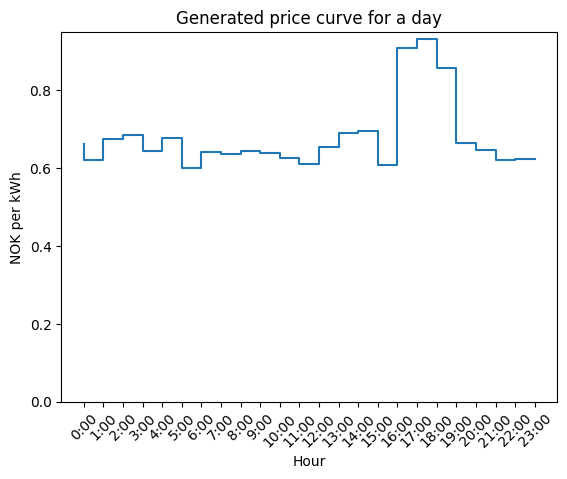

In [34]:
plot_price_curve(costs)


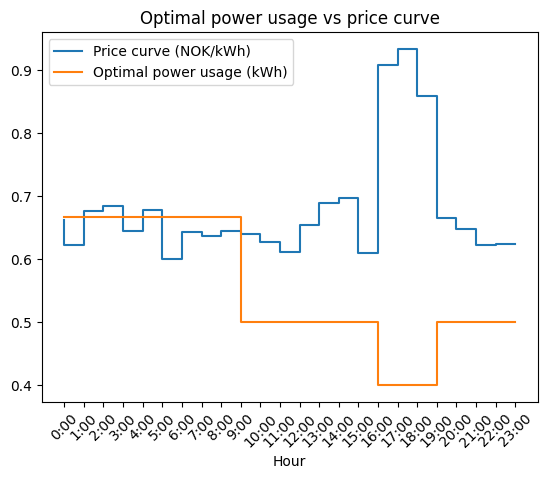

In [35]:
plot_price_curve_vs_usage(costs, optimal_usage)


In [36]:
print(A_eq)
print(b_eq)


[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.